# Problem Statement

Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

Your task is to make a mode that can consider the data provided and predict the Average Price.

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [141]:
pd.set_option('display.max_row',None)

This command display all rows

In [142]:
# import csv file first
Avocado=pd.read_csv("E:\\Data Science\\Data Trained Evaluation Project\\avocado.csv")
Avocado.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [143]:
Avocado.shape

(18249, 14)

The dataset of Avocado dataset has 18249 rows and 14 columns

In [144]:
Avocado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In all columns we dont find any null value, so no need of imputation techniques

In [145]:
Avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


we have total14 columns ,out of 14 columns, 2 columns are object datatype, 2 columns are integer data type and remaining 10 columns are float datatype. in our dataset, column 'AveragePrice',is label or taget variable which is cotinous data type,So our problem is Regression type 

the column 'Unnamed: 0'contains no valuable information, its contains are like serial number, which is not usefull in our dataset, so we will drop this column

In [146]:
Avocado.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

Describe method give stastical analysis of dataframe, it give analysis of numerical columns only, which include, total count, standard deviation, minimum and maximum value of each feature,as well as 25% ,50% and 75% represents first quartile,second quartile and third quartile of dataset

In [147]:
Avocado=Avocado.drop(columns=['Unnamed: 0'],axis=1)
Avocado.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

we sucessfully drop column 'Unnamed: 0',now our dataset has 13 columns

sometime there is empty spaceis present in dataset and it is considered as data,so identify it using following code

In [148]:
Avocado.loc[Avocado['Date']==" "]
Avocado.loc[Avocado['AveragePrice']==" "]
Avocado.loc[Avocado['Total Volume']==" "]
Avocado.loc[Avocado['4046']==" "]
Avocado.loc[Avocado['4225']==" "]
Avocado.loc[Avocado['4770']==" "]
Avocado.loc[Avocado['Total Bags']==" "]
Avocado.loc[Avocado['Small Bags']==" "]
Avocado.loc[Avocado['Large Bags']==" "]
Avocado.loc[Avocado['XLarge Bags']==" "]
Avocado.loc[Avocado['type']==" "]
Avocado.loc[Avocado['year']==" "]
Avocado.loc[Avocado['region']==" "]

Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []

No emptyspace is presentin our dataset so we proceed to next step

the column "Date" has datatype Object,we want to "Date" into multiple column into 'Day','Month'and "Year" but year is already given, so we will convert into " Day" and "Month" columns only

In [154]:
Avocado.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  month  date  
0  Albany     12    27  
1  Albany     12    20  
2  Albany     12    13  
3  Albany     12     6  
4  Albany     11    29

In [155]:
Avocado['month'] =pd.DatetimeIndex(Avocado['Date']).month
Avocado['date'] =pd.DatetimeIndex(Avocado['Date']).day

Here we performed feature engineering, in which date column is converted into 2 more columns, "date" and "month", "year" is already present in data, sso we will keep it

In [156]:
Avocado.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  month  date  
0  Albany     12    27  
1  Albany     12    20  
2  Albany     12    13  
3  Albany     12     6  
4  Albany     11    29

From date column we have sepated day and month and made two separate columns "day" and 'Month', as "year" column is already present in our dataset so use it.

In [157]:
Avocado['XLarge Bags'].value_counts()

0.00         12048
3.33            29
6.67            16
1.11            15
5.00            12
10.00            9
16.67            8
2.22             7
150.00           6
80.00            6
20.00            6
13.33            6
166.67           5
60.00            5
70.00            5
100.00           5
250.00           5
3.00             4
77.78            4
2.00             4
66.67            4
11.27            4
44.44            4
188.89           4
1680.00          4
4.50             4
320.00           4
90.00            4
30.00            4
870.00           4
7.42             4
1.47             4
133.33           4
97.22            4
23.33            4
25.00            4
73.33            4
175.00           4
1000.00          4
480.00           3
32.00            3
102.78           3
73.61            3
1260.00          3
12.00            3
240.00           3
290.28           3
453.33           3
1325.00          3
2.94             3
2.82             3
3.69             3
160.00      

In [158]:
Avocado['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

two class of Avocado Fruits namely "conventional" and 'organic '

<AxesSubplot:xlabel='type', ylabel='count'>

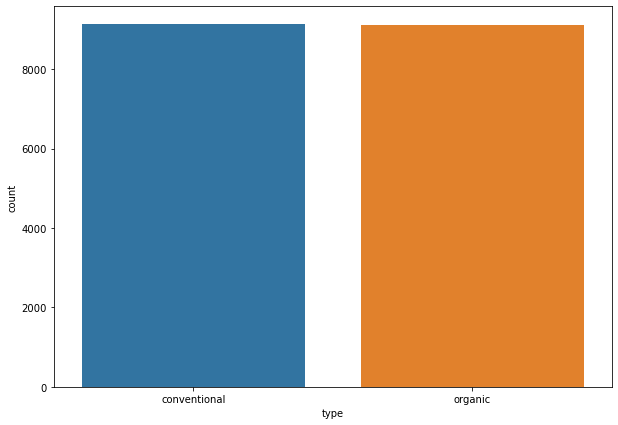

In [159]:
plt.figure(figsize=(10,7))
sns.countplot(Avocado['type'])

In [160]:
Avocado['type']=Avocado['type'].replace(['conventional','organic'],[0,1])

In [161]:
Avocado['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

In [162]:
Avocado['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

Total 4 year data is provided from 2015 to 2018

<AxesSubplot:xlabel='year', ylabel='count'>

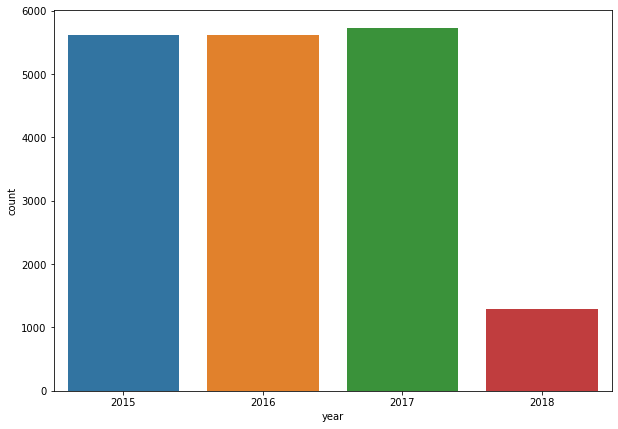

In [163]:
plt.figure(figsize=(10,7))
sns.countplot(Avocado['year'])

In [164]:
Avocado['region'].value_counts()

Columbus               338
DallasFtWorth          338
Boise                  338
Philadelphia           338
Orlando                338
SouthCarolina          338
NorthernNewEngland     338
StLouis                338
Portland               338
Midsouth               338
SouthCentral           338
SanDiego               338
Plains                 338
Nashville              338
HarrisburgScranton     338
CincinnatiDayton       338
SanFrancisco           338
Spokane                338
RaleighGreensboro      338
LasVegas               338
Indianapolis           338
Northeast              338
RichmondNorfolk        338
Louisville             338
Sacramento             338
Houston                338
NewOrleansMobile       338
Southeast              338
NewYork                338
Syracuse               338
Denver                 338
Detroit                338
West                   338
GreatLakes             338
HartfordSpringfield    338
Boston                 338
Jacksonville           338
B

<AxesSubplot:xlabel='region', ylabel='count'>

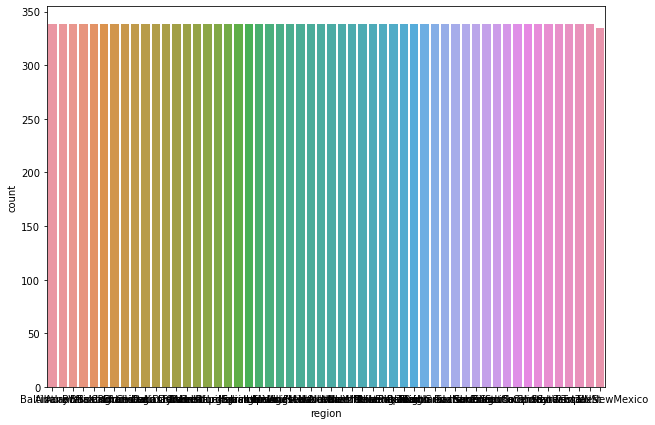

In [165]:
plt.figure(figsize=(10,7))
sns.countplot(Avocado['region'])

In [166]:
Avocado['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [167]:
len(Avocado['region'].unique())

54

Total 54 region are provided, here i used label encoding, which assign numerical to each class from 0 to 53 

In [168]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#lab_enc=LabeLEncoder()
Avocado['region']=le.fit_transform(Avocado['region'].astype(str))

In [169]:
Avocado['region'].value_counts()

47    338
31    338
6     338
37    338
21    338
5     338
52    338
36    338
20    338
4     338
51    338
35    338
19    338
3     338
50    338
34    338
18    338
2     338
49    338
33    338
17    338
1     338
48    338
32    338
16    338
22    338
38    338
7     338
27    338
15    338
46    338
30    338
14    338
45    338
29    338
13    338
44    338
28    338
12    338
43    338
11    338
23    338
42    338
26    338
10    338
41    338
25    338
9     338
40    338
24    338
8     338
39    338
0     338
53    335
Name: region, dtype: int64

In [170]:
Avocado=Avocado.drop(columns=['Date'],axis=1)

We will extracted date and month from original Feature , so no need of Original "Date"column

In [171]:
Avocado.head(3)

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   

   Small Bags  Large Bags  XLarge Bags  type  year  region  month  date  
0     8603.62       93.25          0.0     0  2015       0     12    27  
1     9408.07       97.49          0.0     0  2015       0     12    20  
2     8042.21      103.14          0.0     0  2015       0     12    13

In [172]:
Avocado.shape

(18249, 14)

In [173]:
Avocado['date'].value_counts()

4     756
11    756
18    755
25    755
8     648
10    648
19    648
5     648
22    648
15    648
24    648
17    648
26    648
12    648
1     648
3     648
27    540
28    540
7     540
13    540
21    540
29    540
20    540
14    540
6     539
2     432
31    432
23    432
9     432
30    432
16    432
Name: date, dtype: int64

In [174]:
Avocado['month'].value_counts()

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: month, dtype: int64

In [175]:
Avocado.type=Avocado.type.astype(float)

# Univariate Analysis

AveragePrice       AxesSubplot(0.125,0.749828;0.110714x0.130172)
Total Volume    AxesSubplot(0.257857,0.749828;0.110714x0.130172)
4046            AxesSubplot(0.390714,0.749828;0.110714x0.130172)
4225            AxesSubplot(0.523571,0.749828;0.110714x0.130172)
4770            AxesSubplot(0.656429,0.749828;0.110714x0.130172)
Total Bags      AxesSubplot(0.789286,0.749828;0.110714x0.130172)
Small Bags         AxesSubplot(0.125,0.593621;0.110714x0.130172)
Large Bags      AxesSubplot(0.257857,0.593621;0.110714x0.130172)
XLarge Bags     AxesSubplot(0.390714,0.593621;0.110714x0.130172)
type            AxesSubplot(0.523571,0.593621;0.110714x0.130172)
year            AxesSubplot(0.656429,0.593621;0.110714x0.130172)
region          AxesSubplot(0.789286,0.593621;0.110714x0.130172)
month              AxesSubplot(0.125,0.437414;0.110714x0.130172)
date            AxesSubplot(0.257857,0.437414;0.110714x0.130172)
dtype: object

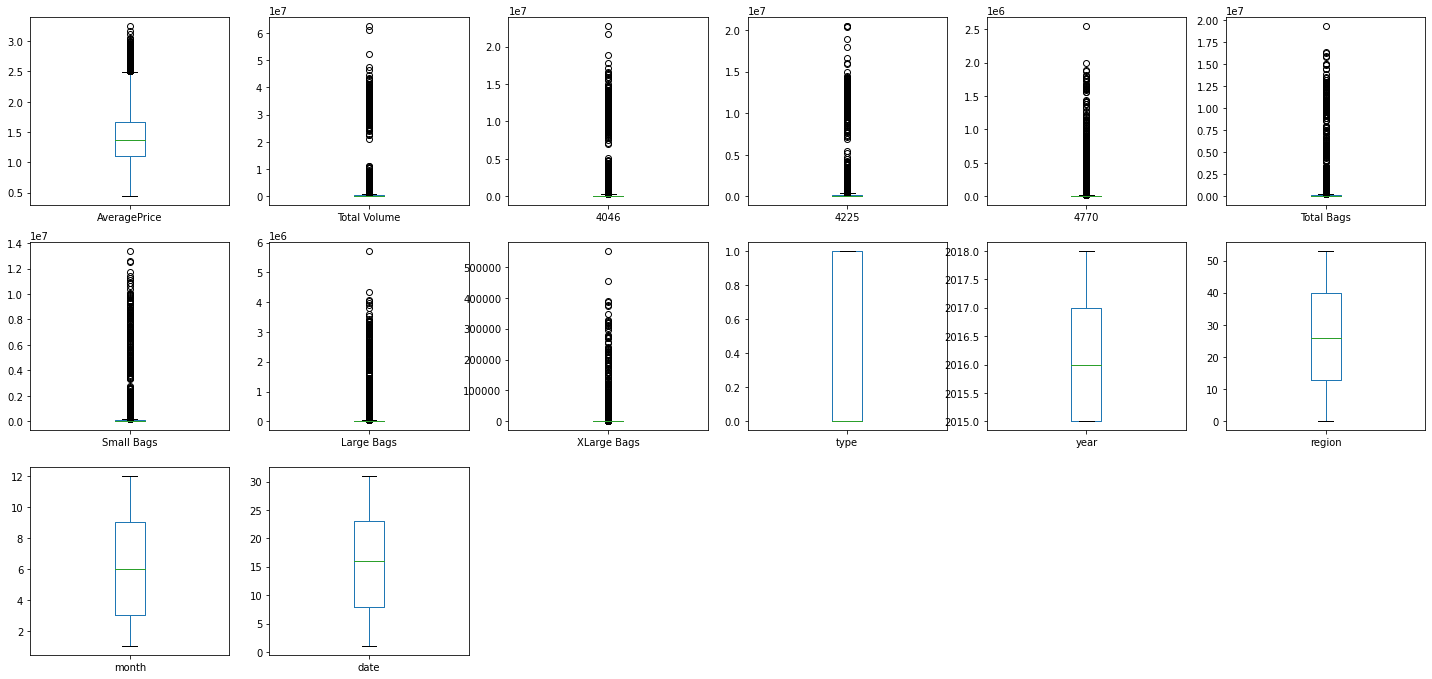

In [176]:
Avocado.plot(kind="box",subplots=True,figsize=(25,20),layout=(5,6))

# Skewness Removal Method

The Continous feature shows lot of skewness and outliers, so we will use Log1p transformation 

In [177]:

Avocado['Total Volume']=np.log1p(Avocado['Total Volume'])#.values.reshape(-1, 1)
Avocado['4046']=np.log1p(Avocado['4046'])#.values.reshape(-1, 1))
Avocado['4225']=np.log1p(Avocado['4225'])#.values.reshape(-1, 1))
Avocado['4770']=np.log1p(Avocado['4770'])#.values.reshape(-1, 1))
Avocado['Total Bags']=np.log1p(Avocado['Total Bags'])#.values.reshape(-1, 1))
Avocado['Small Bags']=np.log1p(Avocado['Small Bags'])#.values.reshape(-1, 1))
Avocado['Large Bags']=np.log1p(Avocado['Large Bags'])#.values.reshape(-1, 1))
Avocado['XLarge Bags']=np.log1p(Avocado['XLarge Bags'])#.values.reshape(-1, 1))


AveragePrice       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total Volume    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
4046             AxesSubplot(0.44569,0.749828;0.133621x0.130172)
4225            AxesSubplot(0.606034,0.749828;0.133621x0.130172)
4770            AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Total Bags         AxesSubplot(0.125,0.593621;0.133621x0.130172)
Small Bags      AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Large Bags       AxesSubplot(0.44569,0.593621;0.133621x0.130172)
XLarge Bags     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
type            AxesSubplot(0.766379,0.593621;0.133621x0.130172)
year               AxesSubplot(0.125,0.437414;0.133621x0.130172)
region          AxesSubplot(0.285345,0.437414;0.133621x0.130172)
month            AxesSubplot(0.44569,0.437414;0.133621x0.130172)
date            AxesSubplot(0.606034,0.437414;0.133621x0.130172)
dtype: object

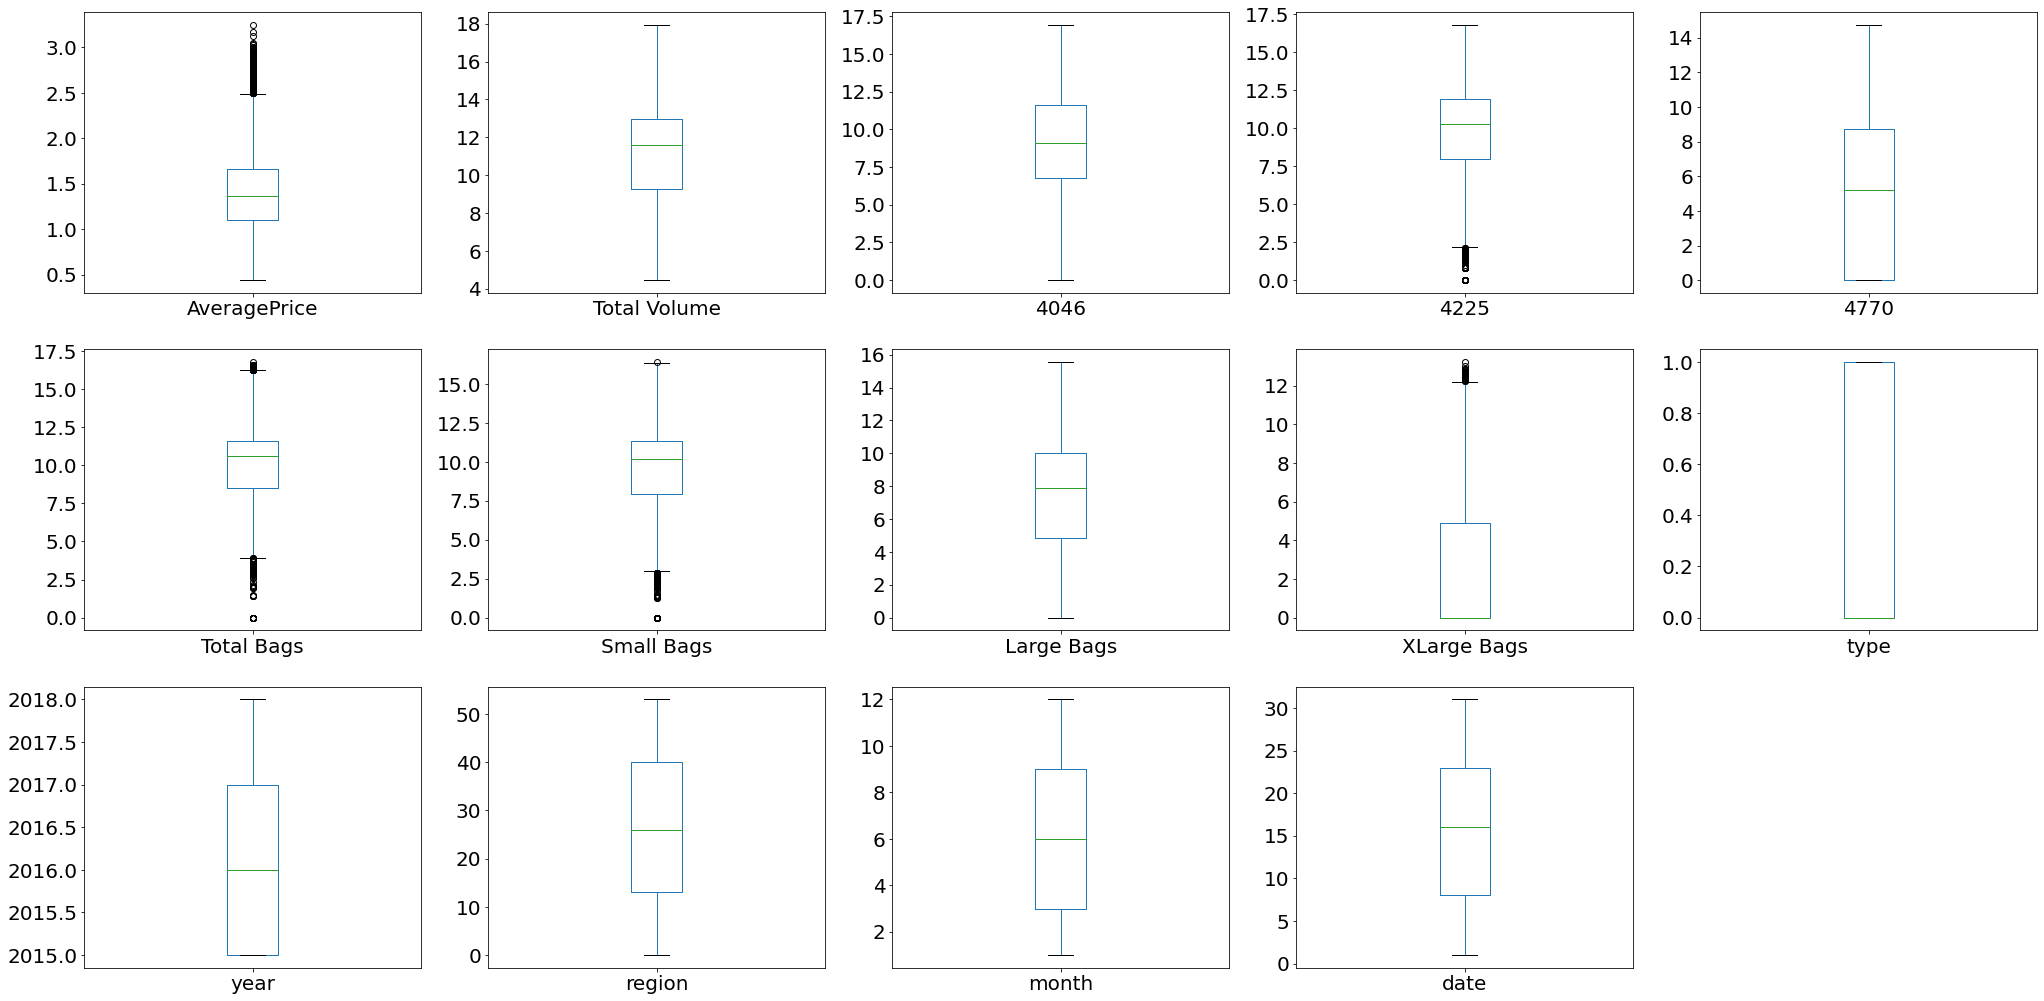

In [178]:
Avocado.plot(kind="box",subplots=True,figsize=(35,30),layout=(5,5),fontsize=20)

Now data achived some proper shape, we remove outliers from the data, using IQR Method

In [179]:
Avocado.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
date            0
dtype: int64

still four columns "4225",'TotalBags','Small Bags' and 'Xlarge Bags' contains outliers, now we will calculate mean of mentioned feature and will replace outlier by the respective mean value 

In [180]:
Avocado.shape

(18249, 14)

In [181]:
Avocado.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
date            0
dtype: int64

# Outlier Removal Method

In [182]:
#find the IQR(Inter Quartile Range) to identify outliers
# 1st Quartile
q1=Avocado.quantile(0.25)
# 3 rd Quartile
q3=Avocado.quantile(0.75)
iqr=q3-q1
# Outlier detection formula
higher=q3+(1.5*iqr)  # uppar bound
lower=q1-(1.5*iqr)  # lower bound

In [183]:
Avocado_2 = Avocado[~((Avocado < (lower)) |(Avocado > (higher))).any(axis=1)]

In [184]:
Avocado_2.shape

(17577, 14)

In [185]:
Avocado_2.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
date            0
dtype: int64

AveragePrice       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total Volume    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
4046             AxesSubplot(0.44569,0.749828;0.133621x0.130172)
4225            AxesSubplot(0.606034,0.749828;0.133621x0.130172)
4770            AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Total Bags         AxesSubplot(0.125,0.593621;0.133621x0.130172)
Small Bags      AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Large Bags       AxesSubplot(0.44569,0.593621;0.133621x0.130172)
XLarge Bags     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
type            AxesSubplot(0.766379,0.593621;0.133621x0.130172)
year               AxesSubplot(0.125,0.437414;0.133621x0.130172)
region          AxesSubplot(0.285345,0.437414;0.133621x0.130172)
month            AxesSubplot(0.44569,0.437414;0.133621x0.130172)
date            AxesSubplot(0.606034,0.437414;0.133621x0.130172)
dtype: object

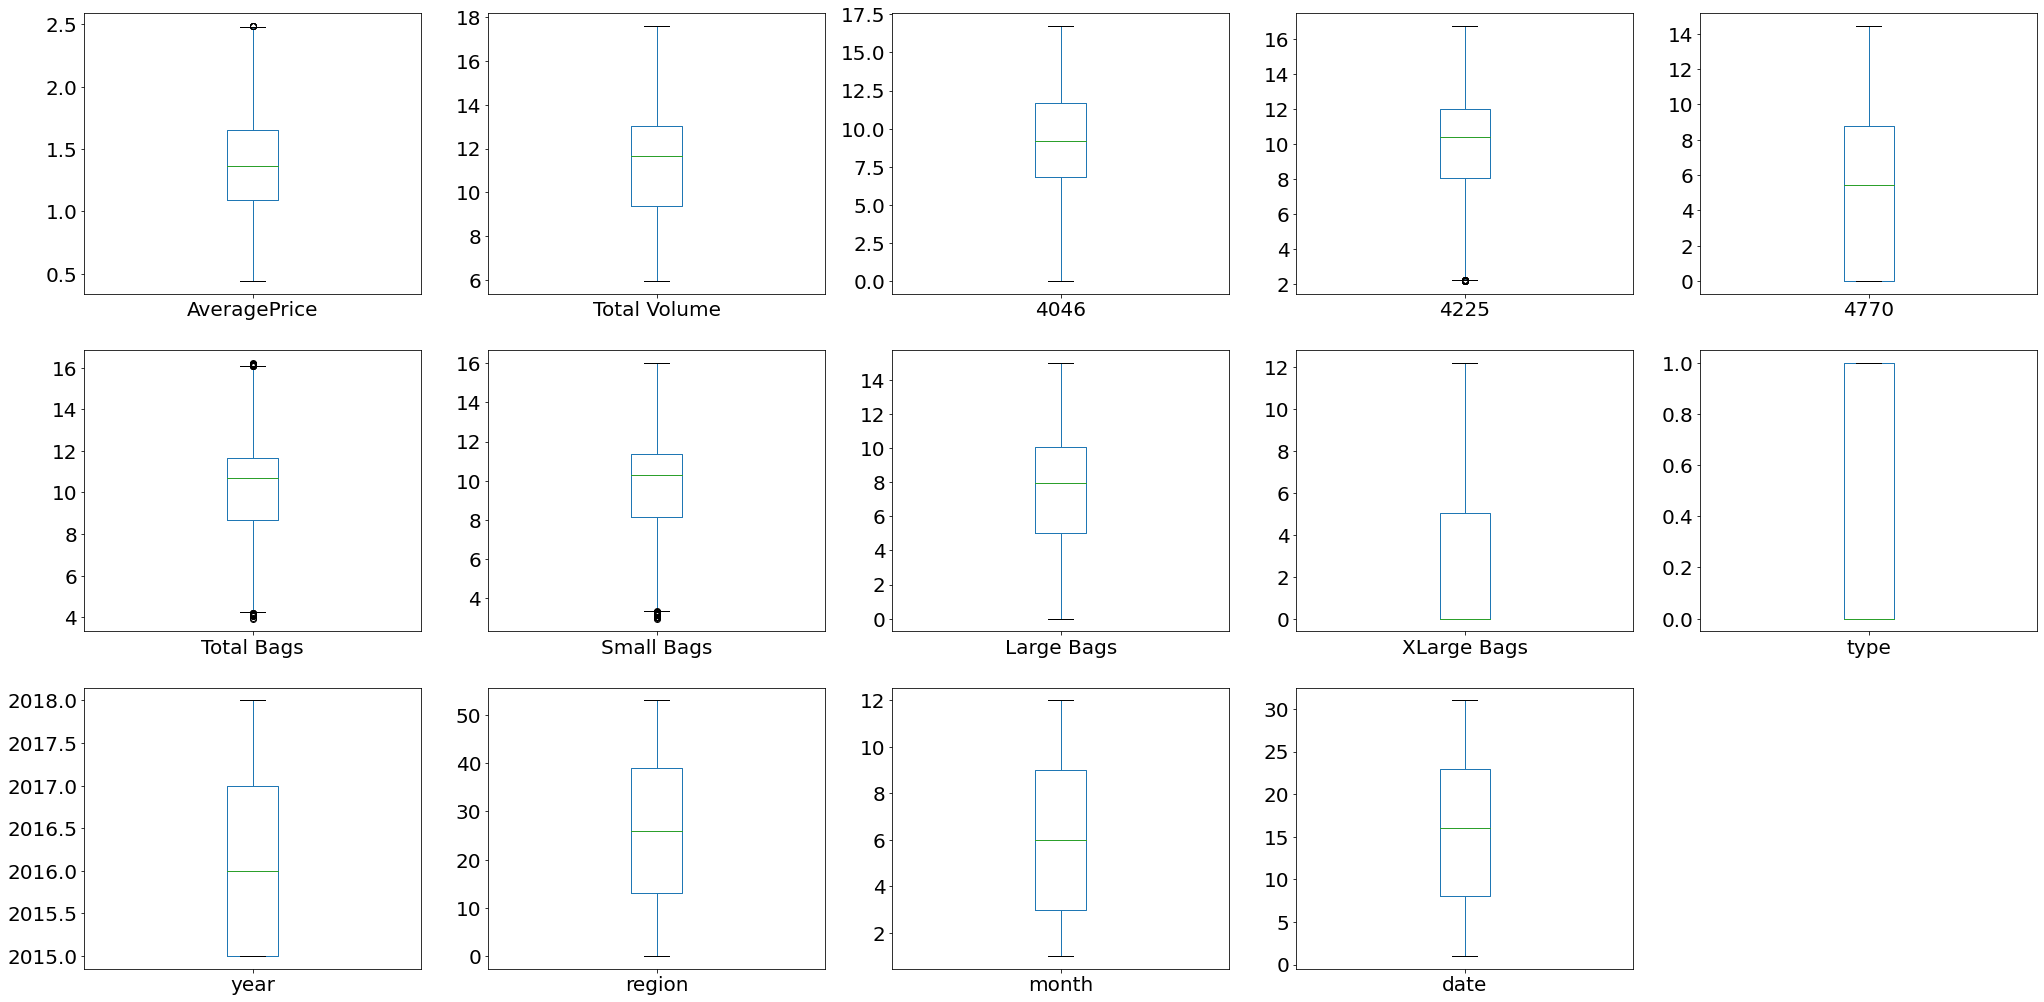

In [186]:
Avocado_2.plot(kind="box",subplots=True,figsize=(35,30),layout=(5,5),fontsize=20)

Here we are managed to removed some outliers, no need of further reductionin data

In [187]:
Avocado_2.shape

(17577, 14)

In [188]:
17577/18249

0.9631760644418872

We lost 4 to 5 percentof data,  

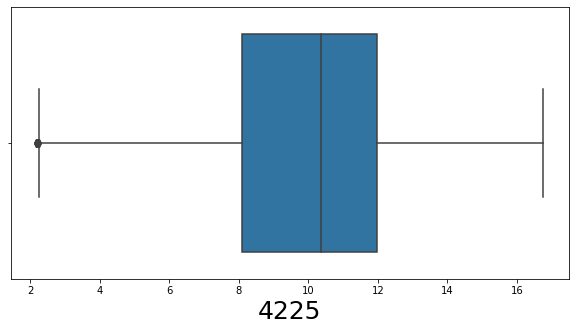

In [189]:
plt.figure(figsize=(10,5))
sns.boxplot(Avocado_2['4225'])
plt.xlabel('4225',fontsize=25)
plt.show()

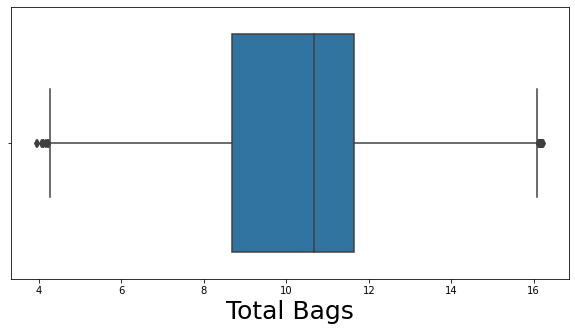

In [190]:
plt.figure(figsize=(10,5))
sns.boxplot(Avocado_2['Total Bags'])
plt.xlabel('Total Bags',fontsize=25)
plt.show()

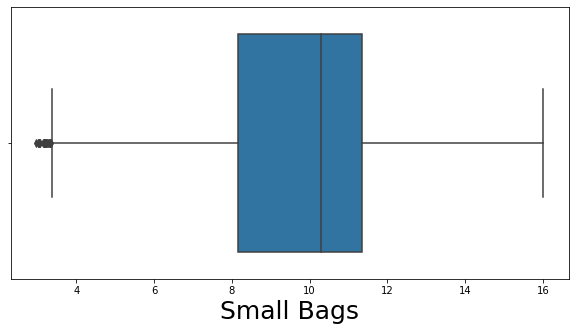

In [191]:
plt.figure(figsize=(10,5))
sns.boxplot(Avocado_2['Small Bags'])
plt.xlabel('Small Bags',fontsize=25)
plt.show()

# Bivariate Analysis

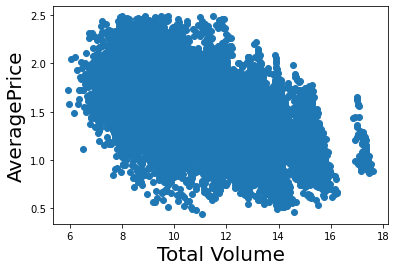

In [192]:
plt.scatter(Avocado_2['Total Volume'],Avocado_2['AveragePrice'])
plt.xlabel('Total Volume',fontsize=20)
plt.ylabel('AveragePrice',fontsize=20)
plt.show()

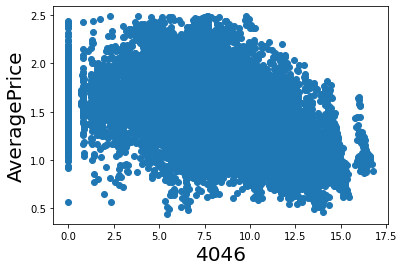

In [61]:
plt.scatter(Avocado_2['4046'],Avocado_2['AveragePrice'])
plt.xlabel('4046',fontsize=20)
plt.ylabel('AveragePrice',fontsize=20)
plt.show()

here we see that, most of the data points has 0 value,so we will replace it with mean of the column

In [133]:
Avocado_2['4046']=Avocado_2['4046'].replace(0,Avocado_2['4046'].mean())

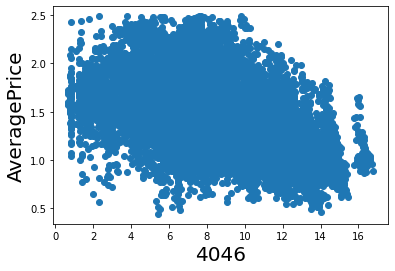

In [134]:
plt.scatter(Avocado_2['4046'],Avocado_2['AveragePrice'])
plt.xlabel('4046',fontsize=20)
plt.ylabel('AveragePrice',fontsize=20)
plt.show()

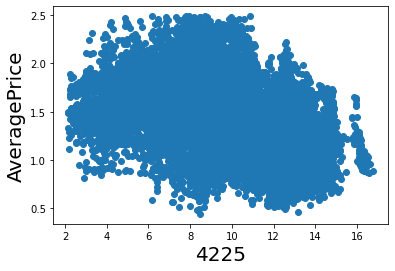

In [62]:
plt.scatter(Avocado_2['4225'],Avocado_2['AveragePrice'])
plt.xlabel('4225',fontsize=20)
plt.ylabel('AveragePrice',fontsize=20)
plt.show()

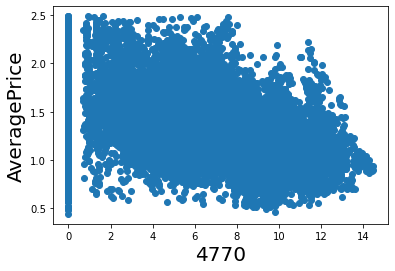

In [63]:
plt.scatter(Avocado_2['4770'],Avocado_2['AveragePrice'])
plt.xlabel('4770',fontsize=20)
plt.ylabel('AveragePrice',fontsize=20)
plt.show()

In [135]:
Avocado_2['4770']=Avocado_2['4770'].replace(0,Avocado_2['4770'].mean())

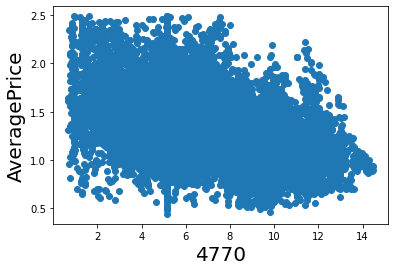

In [136]:
plt.scatter(Avocado_2['4770'],Avocado_2['AveragePrice'])
plt.xlabel('4770',fontsize=20)
plt.ylabel('AveragePrice',fontsize=20)
plt.show()

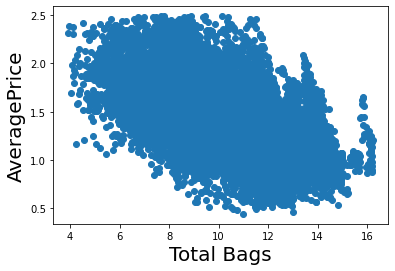

In [64]:
plt.scatter(Avocado_2['Total Bags'],Avocado_2['AveragePrice'])
plt.xlabel('Total Bags',fontsize=20)
plt.ylabel('AveragePrice',fontsize=20)
plt.show()

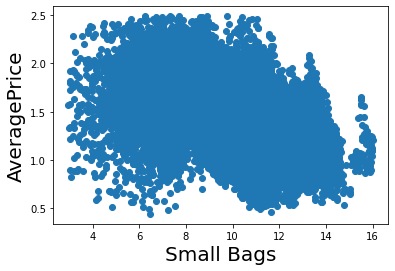

In [65]:
plt.scatter(Avocado_2['Small Bags'],Avocado_2['AveragePrice'])
plt.xlabel('Small Bags',fontsize=20)
plt.ylabel('AveragePrice',fontsize=20)
plt.show()

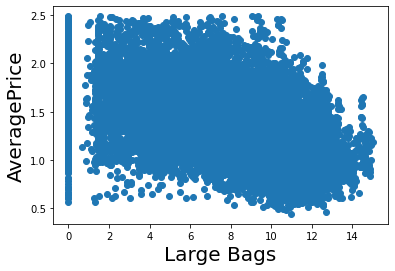

In [66]:
plt.scatter(Avocado_2['Large Bags'],Avocado_2['AveragePrice'])
plt.xlabel('Large Bags',fontsize=20)
plt.ylabel('AveragePrice',fontsize=20)
plt.show()

now here also we replace most of 0 by mean of feature "Large Bags"

In [193]:
Avocado_2['Large Bags']=Avocado_2['Large Bags'].replace(0,Avocado_2['Large Bags'].mean())

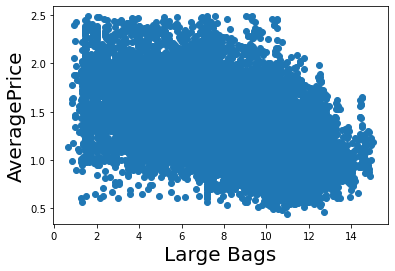

In [194]:
plt.scatter(Avocado_2['Large Bags'],Avocado_2['AveragePrice'])
plt.xlabel('Large Bags',fontsize=20)
plt.ylabel('AveragePrice',fontsize=20)
plt.show()

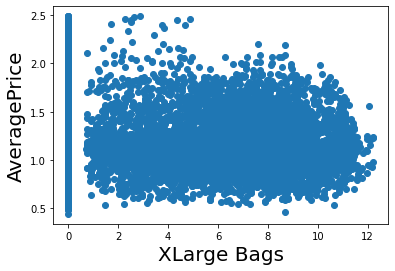

In [195]:
plt.scatter(Avocado_2['XLarge Bags'],Avocado_2['AveragePrice'])
plt.xlabel('XLarge Bags',fontsize=20)
plt.ylabel('AveragePrice',fontsize=20)
plt.show()

In [196]:
Avocado_2['XLarge Bags']=Avocado_2['XLarge Bags'].replace(0,Avocado_2['XLarge Bags'].mean())

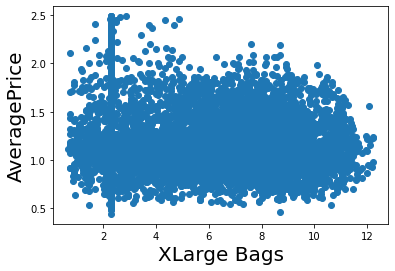

In [197]:
plt.scatter(Avocado_2['XLarge Bags'],Avocado_2['AveragePrice'])
plt.xlabel('XLarge Bags',fontsize=20)
plt.ylabel('AveragePrice',fontsize=20)
plt.show()

In [198]:
Avocado_2.shape

(17577, 14)

In [199]:
Avocado_2.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
date            0
dtype: int64

In [200]:
Avocado_2.shape

(17577, 14)

In [201]:
Avocado_2.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
date            0
dtype: int64

skewness range is + 0.5 to -0.5 anything between this range is permissible and outside this range is high skewness,all values is in presribed range

In [202]:
#Avocado.shape

In [203]:
#Avocado.isnull().sum()

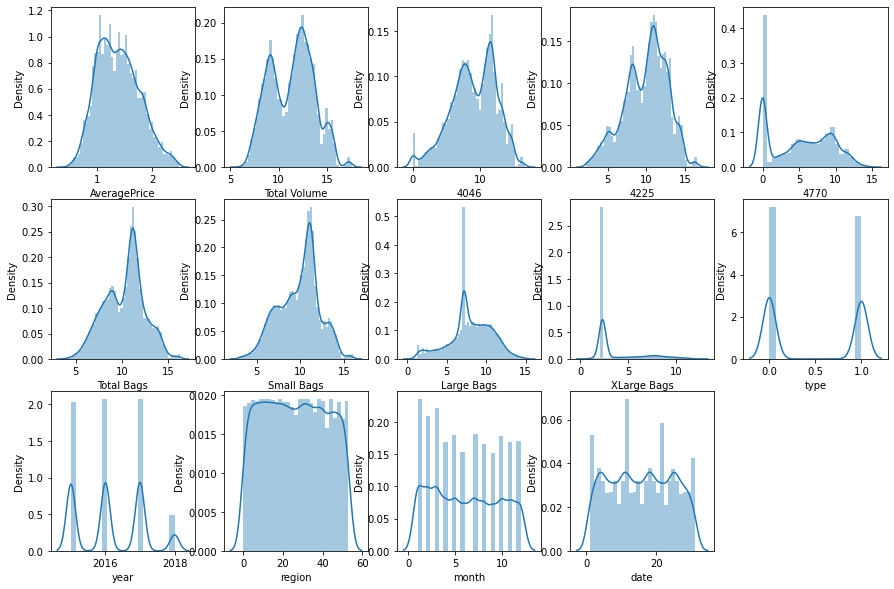

In [204]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in Avocado_2:
    if plotnumber<=15:
        plt.subplot(3,5,plotnumber)
        sns.distplot(Avocado_2[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [205]:
corr_matrix=Avocado_2.corr()   # here we get values of correlation in descending order
corr_matrix['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.618972
month           0.152224
year            0.095711
date            0.030711
region         -0.032725
XLarge Bags    -0.339872
Large Bags     -0.450340
4225           -0.464465
Small Bags     -0.495248
4770           -0.504897
4046           -0.554343
Total Bags     -0.574601
Total Volume   -0.589023
Name: AveragePrice, dtype: float64

first value 1 shows relation between label verses label, so ignore it. the value of correation ranges between -1 to +1, 1 shows strong positive correlation between variable,it means if one variable increses other also increase,-1 represent strong negative correlation between variable,it means if one variable value increase other goes on decreasing, value 0 or near to 0 represents no correlation between variable, in above correlation table "year" value is near about 0, but 'region' and "year" is categorical feature, so we will not worry about it

skewness range is + 0.5 to -0.5 anything between this range is permissible and outside this range is high skewness,all values is in presribed range

In [206]:
Avocado_2.skew()

AveragePrice    0.356107
Total Volume    0.019918
4046           -0.390468
4225           -0.400013
4770            0.038634
Total Bags     -0.152778
Small Bags     -0.265084
Large Bags     -0.329244
XLarge Bags     1.395061
type            0.063643
year            0.216125
region          0.029201
month           0.116659
date            0.015510
dtype: float64

the feature 'XLarge Bags'contains high skewness ,more than 0.5 so we will drop this feature

In [207]:
Avocado_2=Avocado_2.drop(columns=['XLarge Bags'],axis=1)

In [208]:
Avocado_2.head()

AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
0          1.33     11.070344  6.944801  10.905146  3.895080    9.070833   
1          1.35     10.912867  6.515127  10.706381  4.083115    9.159737   
2          0.93     11.680313  6.679222  11.600485  4.879007    9.005325   
3          1.08     11.277116  7.032624  11.184108  4.298373    8.667708   
4          1.28     10.840377  6.848515  10.688288  4.340944    8.729874   

   Small Bags  Large Bags  type  year  region  month  date  
0    9.060055    4.545951   0.0  2015       0     12    27  
1    9.149429    4.589955   0.0  2015       0     12    20  
2    8.992584    4.645736   0.0  2015       0     12    13  
3    8.644425    4.903495   0.0  2015       0     12     6  
4    8.697389    5.291746   0.0  2015       0     11    29

In [209]:
x=Avocado_2.drop(columns=['type','year','region','month','date','AveragePrice'],axis=1)
x.head()

Total Volume      4046       4225      4770  Total Bags  Small Bags  \
0     11.070344  6.944801  10.905146  3.895080    9.070833    9.060055   
1     10.912867  6.515127  10.706381  4.083115    9.159737    9.149429   
2     11.680313  6.679222  11.600485  4.879007    9.005325    8.992584   
3     11.277116  7.032624  11.184108  4.298373    8.667708    8.644425   
4     10.840377  6.848515  10.688288  4.340944    8.729874    8.697389   

   Large Bags  
0    4.545951  
1    4.589955  
2    4.645736  
3    4.903495  
4    5.291746

here i sepated categorical feature from continious features, x contains only conti.features

In [210]:
y=Avocado_2.drop(columns=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags'])
y.head(4)

AveragePrice  type  year  region  month  date
0          1.33   0.0  2015       0     12    27
1          1.35   0.0  2015       0     12    20
2          0.93   0.0  2015       0     12    13
3          1.08   0.0  2015       0     12     6

y contains label 'AveragePrice' and categorical features only

In [211]:
x.head(10)

Total Volume      4046       4225      4770  Total Bags  Small Bags  \
0     11.070344  6.944801  10.905146  3.895080    9.070833    9.060055   
1     10.912867  6.515127  10.706381  4.083115    9.159737    9.149429   
2     11.680313  6.679222  11.600485  4.879007    9.005325    8.992584   
3     11.277116  7.032624  11.184108  4.298373    8.667708    8.644425   
4     10.840377  6.848515  10.688288  4.340944    8.729874    8.697389   
5     10.932764  7.077726  10.780393  3.797958    8.807608    8.788360   
6     11.332060  7.222508  11.207401  4.546057    9.026401    9.011622   
7     11.603034  6.557843  11.530926  4.394449    8.829112    8.743189   
8     11.511048  6.930641  11.377296  4.458293    9.340435    9.315198   
9     11.216401  6.737441  11.078419  4.736198    9.062643    8.994975   

   Large Bags  
0    4.545951  
1    4.589955  
2    4.645736  
3    4.903495  
4    5.291746  
5    4.855462  
6    4.812591  
7    6.333937  
8    5.651893  
9    6.337622

In [212]:
Avocado_2.head(2)

AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
0          1.33     11.070344  6.944801  10.905146  3.895080    9.070833   
1          1.35     10.912867  6.515127  10.706381  4.083115    9.159737   

   Small Bags  Large Bags  type  year  region  month  date  
0    9.060055    4.545951   0.0  2015       0     12    27  
1    9.149429    4.589955   0.0  2015       0     12    20

In [213]:

# now we will use Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [214]:
x_scaled

array([[-0.14041814, -0.6357958 ,  0.35521752, ..., -0.5625415 ,
        -0.34117332, -1.32382534],
       [-0.21046499, -0.76474946,  0.28260553, ..., -0.5212872 ,
        -0.30280394, -1.30737909],
       [ 0.13090034, -0.71550126,  0.60923683, ..., -0.59293942,
        -0.3701392 , -1.28653129],
       ...,
       [-0.82553676, -0.59397138, -0.77717698, ..., -0.52675941,
        -0.30537908, -1.61443556],
       [-0.75300404, -0.51955119, -0.70594967, ..., -0.45482318,
        -0.2388493 , -1.55335025],
       [-0.71907977, -0.32781055, -0.79185871, ..., -0.41261718,
        -0.19877085, -1.79090811]])

In [215]:
Avocado_3=pd.DataFrame(x_scaled)# here converted array into dataframe
Avocado_3

0         1             2         3         4         5  \
0     -0.140418 -0.635796  3.552175e-01 -0.310548 -0.562541 -0.341173   
1     -0.210465 -0.764749  2.826055e-01 -0.264844 -0.521287 -0.302804   
2      0.130900 -0.715501  6.092368e-01 -0.071397 -0.592939 -0.370139   
3     -0.048444 -0.609438  4.571272e-01 -0.212524 -0.749605 -0.519607   
4     -0.242709 -0.664693  2.759957e-01 -0.202177 -0.720758 -0.496869   
5     -0.201615 -0.595902  3.096431e-01 -0.334154 -0.684687 -0.457814   
6     -0.024005 -0.552450  4.656368e-01 -0.152323 -0.583160 -0.361966   
7      0.096526 -0.751930  5.838259e-01 -0.189172 -0.674708 -0.477207   
8      0.055610 -0.640045  5.277020e-01 -0.173655 -0.437438 -0.231638   
9     -0.075451 -0.698029  4.185174e-01 -0.106107 -0.566342 -0.369112   
10    -0.016659 -0.670033  4.750505e-01 -0.097581 -0.589517 -0.379002   
11    -0.138673 -0.509056  3.430982e-01 -0.123060 -0.492046 -0.282391   
12    -0.163362 -0.400971  3.231658e-01 -0.132285 -0.559358 -0.352479   
13     0.085726 -0.590728  5.750890e-01 -0.030120 -0.732111 -0.503909   
14    -0.103734 -0.638325  3.864365e-01 -0.036985 -0.533062 -0.346925   
15    -0.064970 -0.650923  4.237788e-01 -0.051019 -0.532096 -0.338112   
16     0.052756 -0.685126  5.390181e-01  0.076641 -0.601868 -0.385314   
17     0.081081 -0.758273  5.560565e-01  0.156928 -0.483741 -0.267315   
18    -0.042849 -0.739660  4.360104e-01  0.225333 -0.458611 -0.245735   
19    -0.042562 -0.831483  4.399268e-01  0.196490 -0.477637 -0.264020   
20     0.103434 -0.807498  5.807492e-01  0.180013 -0.535143 -0.316325   
21    -0.070723 -0.848446  4.028277e-01  0.349203 -0.419117 -0.206708   
22     0.085534 -0.776316  5.465909e-01  0.413703 -0.369198 -0.161959   
23     0.041142 -0.634250  5.049769e-01  0.617620 -0.441566 -0.231678   
24     0.152330 -0.765653  5.573351e-01  0.773885 -0.083265  0.104367   
25     0.095809 -0.688554  4.602813e-01  0.852469  0.010436  0.190157   
26     0.007280 -0.769250  3.753860e-01  0.795969 -0.042732  0.138688   
27     0.077513 -0.712010  4.802931e-01  0.835270 -0.134545  0.055210   
28     0.007759 -0.695132  3.615099e-01  0.780614 -0.003688  0.170614   
29     0.147600 -0.772662  5.743961e-01 -0.160025 -0.115846  0.067959   
30     0.034213 -0.670841  4.493987e-01 -0.299009 -0.097749  0.085072   
31     0.062945 -0.762099  4.540712e-01 -0.263333  0.001918  0.176909   
32     0.098267 -0.604564  5.045571e-01 -0.149605 -0.042812  0.138258   
33     0.139130 -0.541372  5.844897e-01  0.013742 -0.256453 -0.060717   
34    -0.176754 -0.671655  2.895062e-01  0.051733 -0.391613 -0.191182   
35    -0.255566 -0.686424  2.024240e-01 -0.161895 -0.384001 -0.195607   
36    -0.260262 -0.723354  1.825240e-01 -0.315593 -0.331738 -0.144523   
37    -0.266657 -0.690345  1.419579e-01 -0.500513 -0.248710 -0.063245   
38    -0.275971 -0.658301  1.997223e-01 -0.151037 -0.465113 -0.282265   
39    -0.116410 -0.545229  3.821625e-01 -0.162217 -0.619987 -0.417118   
40    -0.285610 -0.418184  1.865065e-01 -0.051360 -0.509523 -0.309957   
41    -0.318475 -0.420091  1.428351e-01 -0.136332 -0.480871 -0.277059   
42    -0.345510 -0.715132  1.419157e-01 -0.023641 -0.537356 -0.330144   
43    -0.204677 -0.785361  2.906551e-01  0.008250 -0.538902 -0.322504   
44    -0.292104 -0.621221  1.943277e-01 -0.036184 -0.527480 -0.321831   
45    -0.334018 -0.650640  1.379839e-01  0.057435 -0.483458 -0.277476   
46    -0.240845 -0.554991  2.343193e-01 -0.017345 -0.469781 -0.271784   
47    -0.096683 -0.555759  3.907474e-01  0.005343 -0.530276 -0.313768   
48    -0.297271 -0.664725  1.744125e-01 -0.016031 -0.460086 -0.272198   
49    -0.303584 -0.673528  1.557208e-01 -0.061846 -0.416227 -0.211013   
50    -0.338022 -0.645761  1.568774e-01 -0.077726 -0.577290 -0.370469   
51    -0.341510 -0.335715  1.159575e-01 -0.302094 -0.511105 -0.313014   
52     0.657349  1.056897  1.036588e-01  0.128178  0.380347  0.402160   
53     0.589365  1.012313  1.922896e-03 -0.128282  0.324245  0.387099   

In [216]:
Avocado_3.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [217]:
y.isnull().sum()

AveragePrice    0
type            0
year            0
region          0
month           0
date            0
dtype: int64

In [218]:
Avocado_4 = pd.concat([Avocado_3, y],axis = 1, join = 'inner', sort=False)  # here concate both dataframe after scaling

In [219]:
Avocado_4.head()

0         1         2         3         4         5         6  \
0 -0.140418 -0.635796  0.355218 -0.310548 -0.562541 -0.341173 -1.323825   
1 -0.210465 -0.764749  0.282606 -0.264844 -0.521287 -0.302804 -1.307379   
2  0.130900 -0.715501  0.609237 -0.071397 -0.592939 -0.370139 -1.286531   
3 -0.048444 -0.609438  0.457127 -0.212524 -0.749605 -0.519607 -1.190196   
4 -0.242709 -0.664693  0.275996 -0.202177 -0.720758 -0.496869 -1.045090   

   AveragePrice  type  year  region  month  date  
0          1.33   0.0  2015       0     12    27  
1          1.35   0.0  2015       0     12    20  
2          0.93   0.0  2015       0     12    13  
3          1.08   0.0  2015       0     12     6  
4          1.28   0.0  2015       0     11    29

In [220]:
Avocado_4.isnull().sum()

0               0
1               0
2               0
3               0
4               0
5               0
6               0
AveragePrice    0
type            0
year            0
region          0
month           0
date            0
dtype: int64

In [221]:
x1=Avocado_4.drop(columns=['AveragePrice','region'],axis=1)

In [222]:
x1.head(2)

0         1         2         3         4         5         6  type  \
0 -0.140418 -0.635796  0.355218 -0.310548 -0.562541 -0.341173 -1.323825   0.0   
1 -0.210465 -0.764749  0.282606 -0.264844 -0.521287 -0.302804 -1.307379   0.0   

   year  month  date  
0  2015     12    27  
1  2015     12    20

In [223]:
y1=Avocado_4['AveragePrice']

In [224]:
x1.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
type     0
year     0
month    0
date     0
dtype: int64

we have total 12 features , if we select  4 feature we almost more than 95% variance, now we build model using 4 feature

In [225]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Train test split is used to evaluate the performance of algorithm when we have large data,It divide the data into two set,training and testing phase, training data is used for fitting machine learning model and testing data is used for evaluating model performance r2 score is statistical measure that repesent proportion of variance for dependant variable

In [226]:
# finding best random state
from sklearn.tree import DecisionTreeRegressor
maxAccu=0  # initially max accuracy is set to 0
MaxRs=0  # initially Random state is set to 0
for i in range(1,200): # in for loop we pass 1 to 200 number out of which random state is selected
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=i) # used train_test_split in for loop
    mod=DecisionTreeRegressor()
    mod.fit(x_train,y_train)  # fit training data of feature and label to model decision tree
    pred=mod.predict(x_test) # predict label by using test features
    acc=r2_score(y_test,pred) # genrate accuracy score by comparing test label and predicted label
    if acc> maxAccu:
        maxAccu=acc # assign accuracy score to max accuracy
        MaxRs=i  # the number at which we get maxaccuracy is treated as random state
print('Best Accuracy is',maxAccu,"on Random state",MaxRs)

Best Accuracy is 0.5696237559363866 on Random state 198


In [227]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=MaxRs)

In train test split we pass x scaled and y output, test size is 25% and random state is MaxRs which is generated by above code

In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from  sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [229]:
# model instantiating and training
Li_reg=LinearRegression()  # assign linear regression as Li_reg
Li_reg.fit(x_train,y_train) # fit train feature and label to linear regression


LinearRegression()

In [230]:
# find r2 score for trained model
Li_reg.score(x_train,y_train)  # find r2 score for train data

0.440099275034445

In [231]:
# lets check,how model fits to test data
Li_reg.score(x_test,y_test)

0.45725794835293565

In [232]:
pred1=Li_reg.predict(x_test)  # now we predict label by passing test feature
Linear_regression_score=r2_score(y_test,pred1) # we get r2 score by passing predicted label and actual label
Linear_regression_score

0.45725794835293565

In [233]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [234]:
mean_absolute_error(y_test,pred1)

0.21750993261245152

mean absolute error -it represent average error

In [235]:
mean_squared_error(y_test,pred1)

0.07848006047295354

It is similar to MAE but noise is largerand large error are punished.it is harder to interpret than MAE as it is not in base units

In [236]:
from sklearn.linear_model import Lasso,LassoCV

Lasso regularization will retun best alpha after max iterarion, alpha is learning rate

In [237]:
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [238]:
LassoCV(normalize=True)

LassoCV(normalize=True)

In [239]:
# best alpha parameter
alpha=lasscv.alpha_
alpha

4.871454670861562e-06

now we have best parameter, lets use lasso regression and see how well our data fits 

In [240]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=4.871454670861562e-06)

In [241]:
lasso_reg.score(x_test,y_test)

0.4572574394570297

as both score are same ,so our model is not overfitted

In [242]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
pred2=KNR.predict(x_test)
KNR__score=r2_score(y_test,pred2)
KNR__score

0.46678352059973205

KNN store all cases and classify new model based on distance(Euclidean method),classification done by majority of votes neighbors

In [243]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred3=DTR.predict(x_test)
DTR__score=r2_score(y_test,pred3)
DTR__score

0.5509468710376182

Decision Tree builds model in the form of tree structure,it divide the dataset into smaller and smaller subset, we determine the root node,then split the subsets,repeat the process till all instance have same class

In [244]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred4=RFR.predict(x_test)
RFR__score=r2_score(y_test,pred4)
RFR__score

0.7690219075884006

it is ensemble algorithm which combines more than one algorithm of same or different kind.Random Forest gives outcome based on predictions of number of models by taking mean of output from various trees

In [245]:
ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)
pred5=ABR.predict(x_test)
ABR__score=r2_score(y_test,pred5)
ABR__score

0.5036659768075844

Adaboost regressor is meta estimator that begin by fitting a regressor on original dataset, and then fits additional copies of regressor on same dataset but where the weights of instance are adjusted 

In [246]:
svr=SVR()
svr.fit(x_train,y_train)
pred6=svr.predict(x_test)
SVR__score=r2_score(y_test,pred6)
SVR__score

0.05159378067095699

SVR is effective when number of dimensions are greater than number of samples,it uses subset of training points(support vector) and hyperplane to give classification output

In [247]:
from sklearn.model_selection import cross_val_score

CV is a technique used to check whether model is overfitted or not, if model accuracy is high, then there is chances of model is overfitted.We use CV score for every model,for this we require model,features and labels, cv is cross validation spliting strategy.finally it take mean of all iteration and return cv score

In [248]:
Linear_regression_cv_score=cross_val_score(Li_reg,x1,y1,cv=5,scoring='r2').mean() # we pass Linear regression model,feature,target and cv=5 means 4 set for training and 1 for testing
Linear_regression_cv_score

0.07793339092521048

In [249]:
KNR_CV_score=cross_val_score(KNR,x1,y1,cv=5,scoring='r2').mean() # we pass KNR model,feature,target and cv=5 means 4 set for training and 1 for testing
KNR_CV_score

-0.3237811583221961

In [250]:
DTR_CV_score=cross_val_score(DTR,x1,y1,cv=5,scoring='r2').mean() # we pass model Decision Tree Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
DTR_CV_score

-0.6251386593448818

In [251]:
RFR_CV_score=cross_val_score(RFR,x1,y1,cv=5).mean() # we pass model Random Forest Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
RFR_CV_score

-0.0037104597835375674

In [252]:
ABR_CV_score=cross_val_score(ABR,x1,y1,cv=5).mean() # we pass model Ada boost Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
ABR_CV_score

0.03937868063855354

In [253]:
SVR_CV_score=cross_val_score(svr,x1,y1,cv=5).mean() # we pass model Support Vector Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
SVR_CV_score

-1.104251442108485

In [254]:
Linear_regression_diff=Linear_regression_score*100-Linear_regression_cv_score*100
print('Linear_regression_diff',Linear_regression_diff)
KNR_diff=KNR__score*100-KNR_CV_score*100
print('KNR_diff',KNR_diff)
DTR_diff=DTR__score*100-DTR_CV_score*100
print("DTR_diff",DTR_diff)
RFR_diff=RFR__score*100-RFR_CV_score*100
print("RFR_diff",RFR_diff)
ABR_diff=ABR__score*100-ABR_CV_score*100
print("ABR_diff",ABR_diff)
SVR_diff=SVR__score*100-SVR_CV_score*100
print("SVR_diff",SVR_diff)

Linear_regression_diff 37.93245574277252
KNR_diff 79.05646789219281
DTR_diff 117.60855303825
RFR_diff 77.27323673719383
ABR_diff 46.428729616903084
SVR_diff 115.5845222779442


The accuracy score for RFR is highest.now i will use hyperparameter tuning for Random Forest regressor

In [255]:
from sklearn.model_selection import GridSearchCV

GridsearchCV is parameter tuning approach which build and evaluate the model performance based on best parameters, we pass parameters of only those model which has less difference between accuracy and cv score. after passing the best parameter we can get best and authenticated accuracy which is not overfitted also

In [256]:
params={'n_estimators':[10,12,13],
       'bootstrap':['True','False'],
       'max_depth':[10,13,15],
       'min_samples_leaf':[5,6,7],
       'min_samples_split':[10,11,12],
       'max_features':['auto','log2']}

In [257]:
Grid_RFR=GridSearchCV(RandomForestRegressor(),param_grid=params,cv=5)
Grid_RFR.fit(x_train,y_train)
Grid_RFR.best_params_

{'bootstrap': 'True',
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 12}

now we will pass this parameter to Random forest regressor to get best r2 score

In [258]:
Final_RFR=RandomForestRegressor(bootstrap=True,max_depth=15 ,min_samples_leaf=5  ,min_samples_split=10,n_estimators=12,max_features='auto')
Final_RFR.fit(x_train,y_train)
final_pred=Final_RFR.predict(x_test)
final_score=r2_score(y_test,final_pred)
print(final_score*100)

73.33245212287567


We get aacuracy  after hyperparameter tuning

In [259]:
import joblib
joblib.dump(Final_RFR,"Avocado.pkl")

['Avocado.pkl']

In [261]:
#Here we saved model successfully